In [1]:
import re
from pathlib import Path
from collections import Counter, defaultdict, deque

import torch
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
id2vocab = dict(enumerate(Path('../../bert-base-uncased-vocab.txt').read_text(encoding="utf-8").splitlines()))
id2unused = {k: v for k, v in id2vocab.items() if '[unused' in v}
unused_ids = list(id2unused)

### New Term Counts

In [6]:
EXP = Path('2pct_random')

token_counts = Counter(tqdm(torch.load(EXP / 'corpus_cache.pt').numpy().ravel()))
augmented_vocab = dict(enumerate((EXP / 'vocab.txt').read_text().splitlines()))

100%|██████████| 79364608/79364608 [00:53<00:00, 1475916.95it/s]


In [7]:
new_tokens_counts = {augmented_vocab[k]: v for k, v in token_counts.items() if k < 1000 and k in unused_ids}
new_tokens_counts = pd.Series(new_tokens_counts).sort_values(ascending=False)
# new_tokens_counts /= new_tokens_counts.sum()
new_tokens_counts

neuro        33336
immuno       24965
##oph        21181
##cyt        20652
dis          20637
             ...  
dysplasia     1485
lag           1484
##azine        939
##aemia        924
##opic         584
Length: 994, dtype: int64

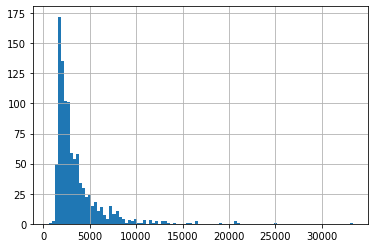

In [8]:
new_tokens_counts.hist(bins=100)

## What are the most common terms?

In [ ]:
wordcloud = WordCloud(background_color='white', width=800, height=400)
wordcloud.generate_from_frequencies(new_tokens_counts)

In [ ]:
print(str(EXP))
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

2pct_similar


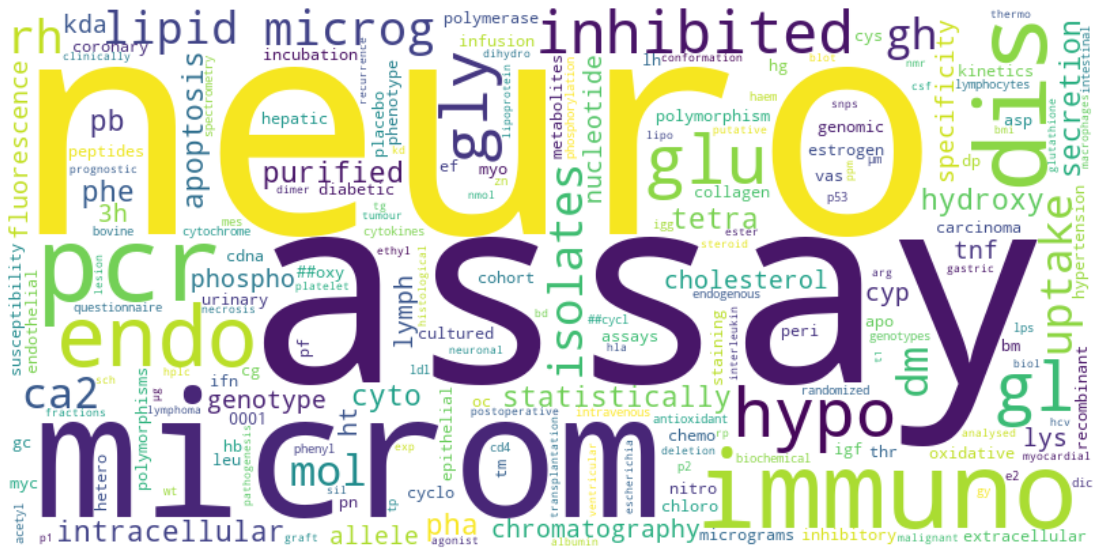

In [13]:
print(str(EXP))
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

2pct_random


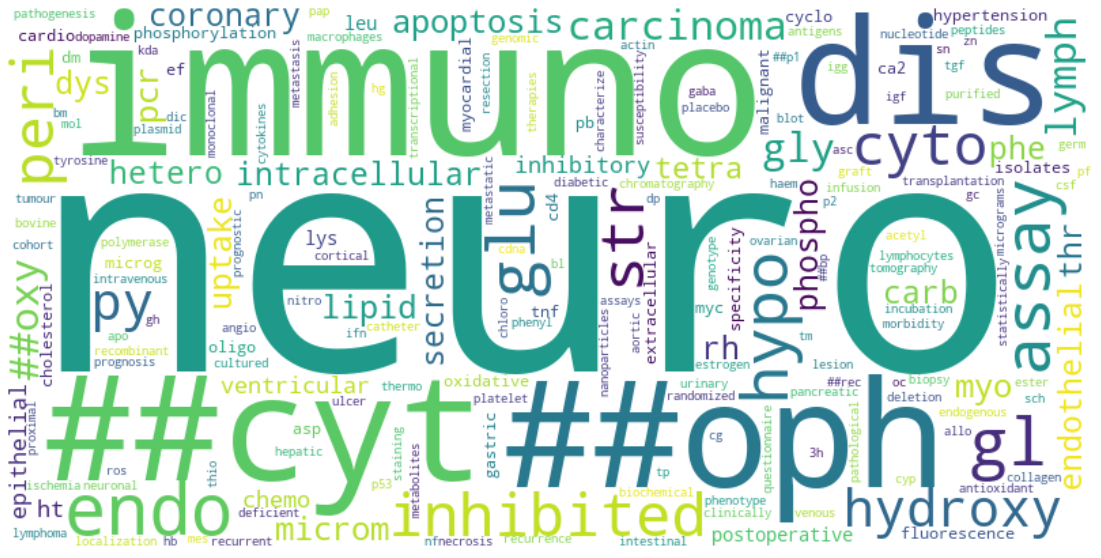

In [9]:
print(str(EXP))
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## How many are actual words?

In [7]:
def get_words(path: str):
    with open(path) as f:
        for line in f:
            yield from line.strip().lower().replace('-', ' ').split(' ')

In [8]:
words = set(tqdm(get_words(EXP / 'pubmed_corpus_random_2pct_seed42.txt')))

56651863it [00:30, 1888335.57it/s]


In [11]:
def filter_terms(terms):
    terms = [w for w in sorted(terms, key=len) if not w.startswith('##')]
    
    filtered = []
    for i in tqdm(range(len(terms))):
        for j in range(i + 1, len(terms)):
            if re.search(f'^{terms[i]}', terms[j]):
                break
        else:
            filtered.append(terms[i])
    return filtered

def derived_from_counts(terms: list, words: set) -> Counter:
    # Filter out values from terms itself
    terms = list(reversed(filter_terms(terms)))
    
    words = words.copy()
    counted_words = set()
    counter = Counter()
    for term in tqdm(terms):
        for word in words:
            if not word.startswith(term):
                continue
            if re.search(f'^{term}.+', word):
                counted_words.add(word)
                counter[term] += 1
#                 counted[word] = Trueab
        words -= counted_words
    return counter

In [12]:
counts = derived_from_counts(new_tokens_counts.index, words)
counts

100%|██████████| 861/861 [04:39<00:00,  3.08it/s]


Counter({'immunohistochemistry': 13,
         'immunohistochemical': 8,
         'immunofluorescence': 8,
         'neurodegenerative': 2,
         'histopathological': 9,
         'pharmacokinetics': 10,
         'echocardiography': 10,
         'immunoreactivity': 6,
         'immunodeficiency': 4,
         'gastrointestinal': 5,
         'chromatographic': 7,
         'retrospectively': 6,
         'electrochemical': 8,
         'pathophysiology': 4,
         'atherosclerosis': 10,
         'supplementation': 10,
         'epidemiological': 7,
         'electrophoresis': 19,
         'pharmacological': 11,
         'transcriptional': 10,
         'transplantation': 20,
         'phosphorylation': 21,
         'histologically': 5,
         'carcinogenesis': 10,
         'polymerization': 14,
         'microorganisms': 8,
         'preferentially': 3,
         'immunoreactive': 6,
         'quantitatively': 4,
         'intraoperative': 7,
         'hepatocellular': 2,
         'staph

## How many are continuating subwords?

In [17]:
res = new_tokens_counts[['##' in x for x in new_tokens_counts.index]]
print(f'There are {len(res)} continuating subwords')
res

There are 29 continuating subwords


##°c          0.002192
##f1          0.002028
##azine       0.001870
##emic        0.001472
##ectomy      0.001002
##prop        0.000812
##p1          0.000809
##ogenesis    0.000746
##amide       0.000703
##oxy         0.000701
##k1          0.000678
##mid         0.000620
##oph         0.000572
##aemia       0.000549
##bp          0.000536
##alpha       0.000535
##benz        0.000516
##omas        0.000500
##idine       0.000497
##o2          0.000487
##b1          0.000472
##r1          0.000465
##oyl         0.000459
##mor         0.000450
##c1          0.000444
##opathy      0.000429
##t1          0.000425
##but         0.000418
##ethyl       0.000411
dtype: float64